In [1]:
import lucid_kietzmannlab.modelzoo.vision_models as models
from lucid_kietzmannlab.modelzoo.vision_models import plot_selected_layer_tensors
from scipy.misc import face
from skimage.transform import resize
import numpy as np
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

/var/folders/cq/2n99h6c91yqdtk3mt7ldl3w40000gq/T/ipykernel_33383/2305433155.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face_image = face()


(None, 227, 227, 3)
(None, 55, 55, 96)
(None, 13, 13, 128)
(None, 13, 13, 128)
(None, 4096)


2024-06-12 16:59:09.178823: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


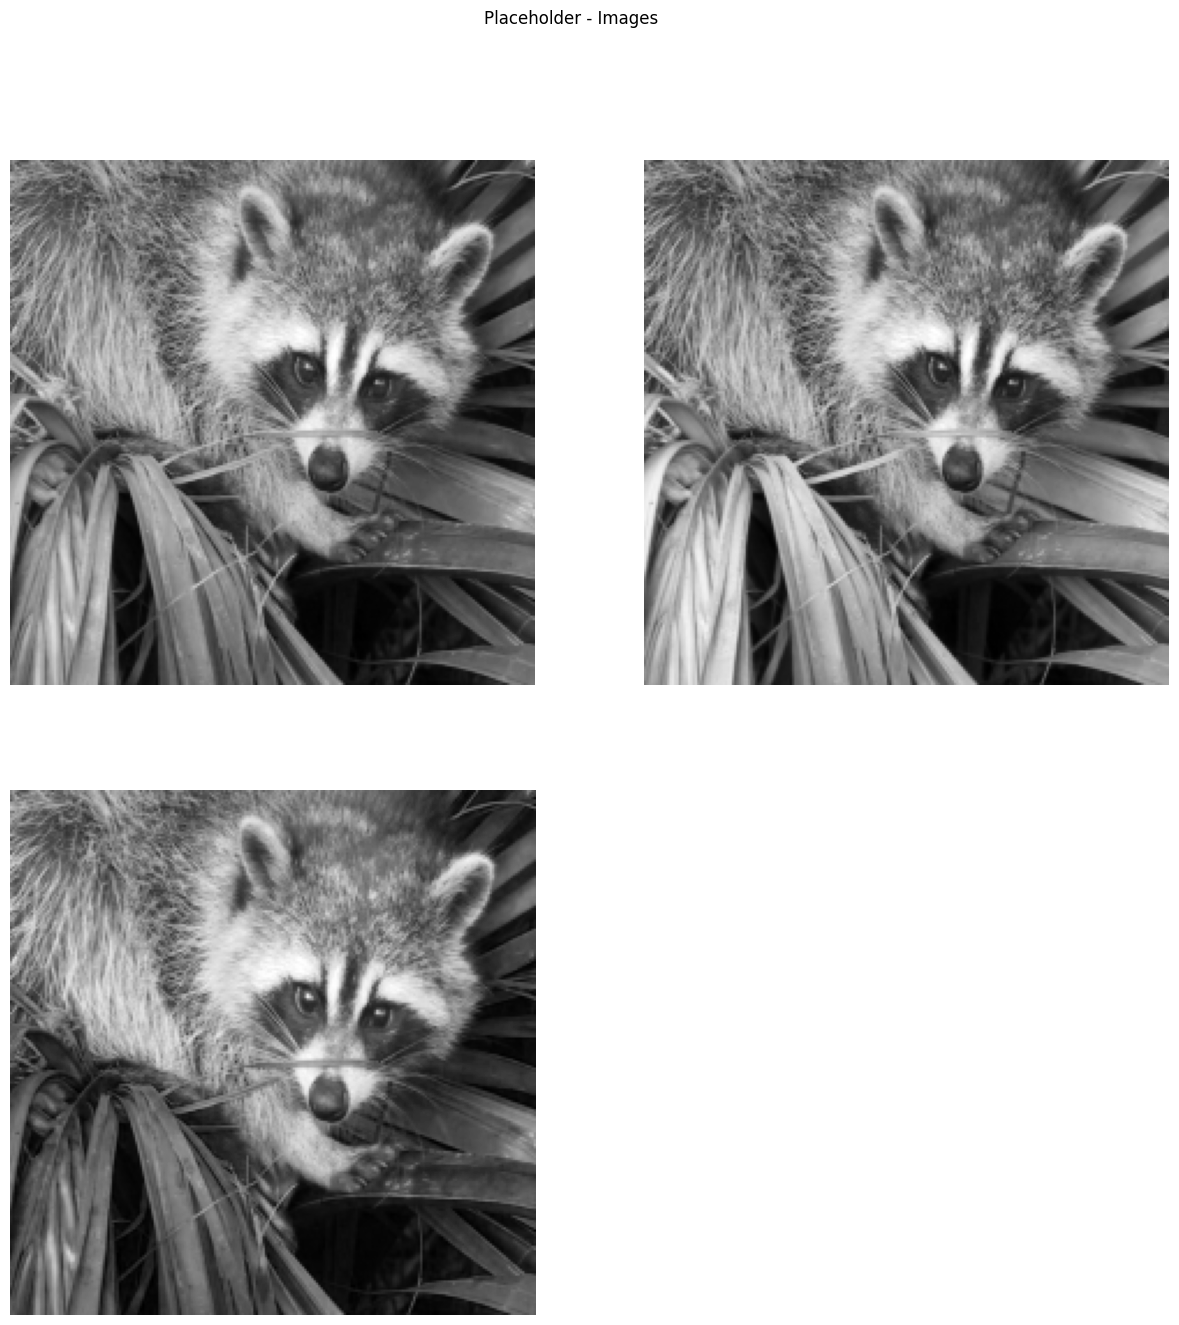

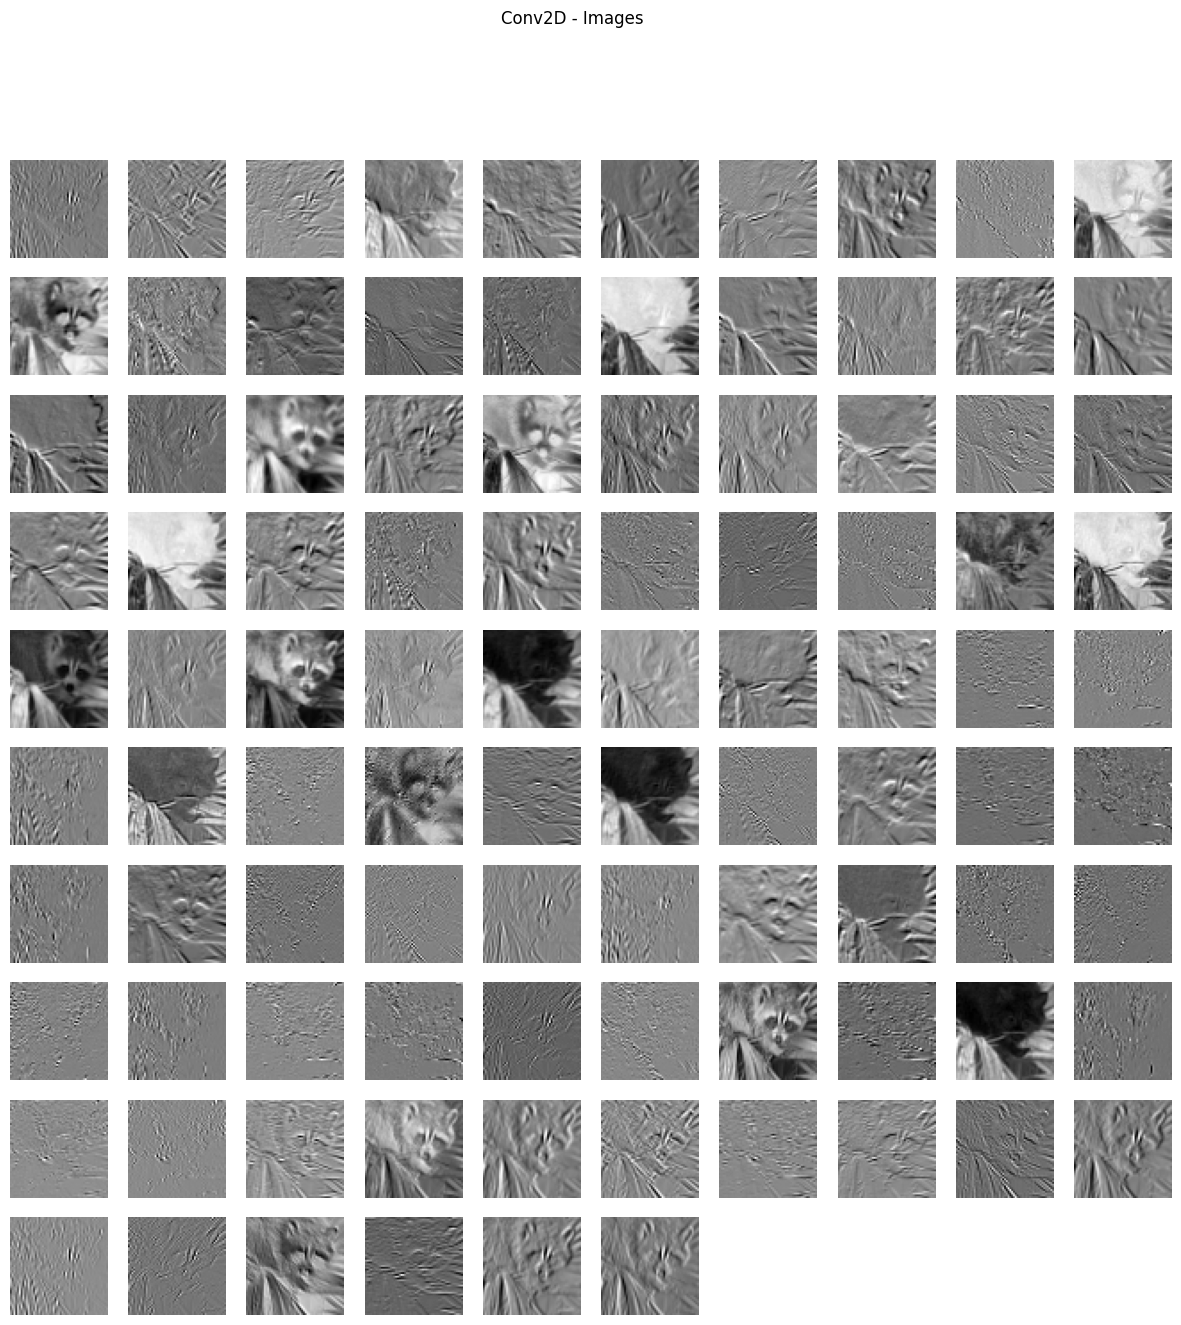

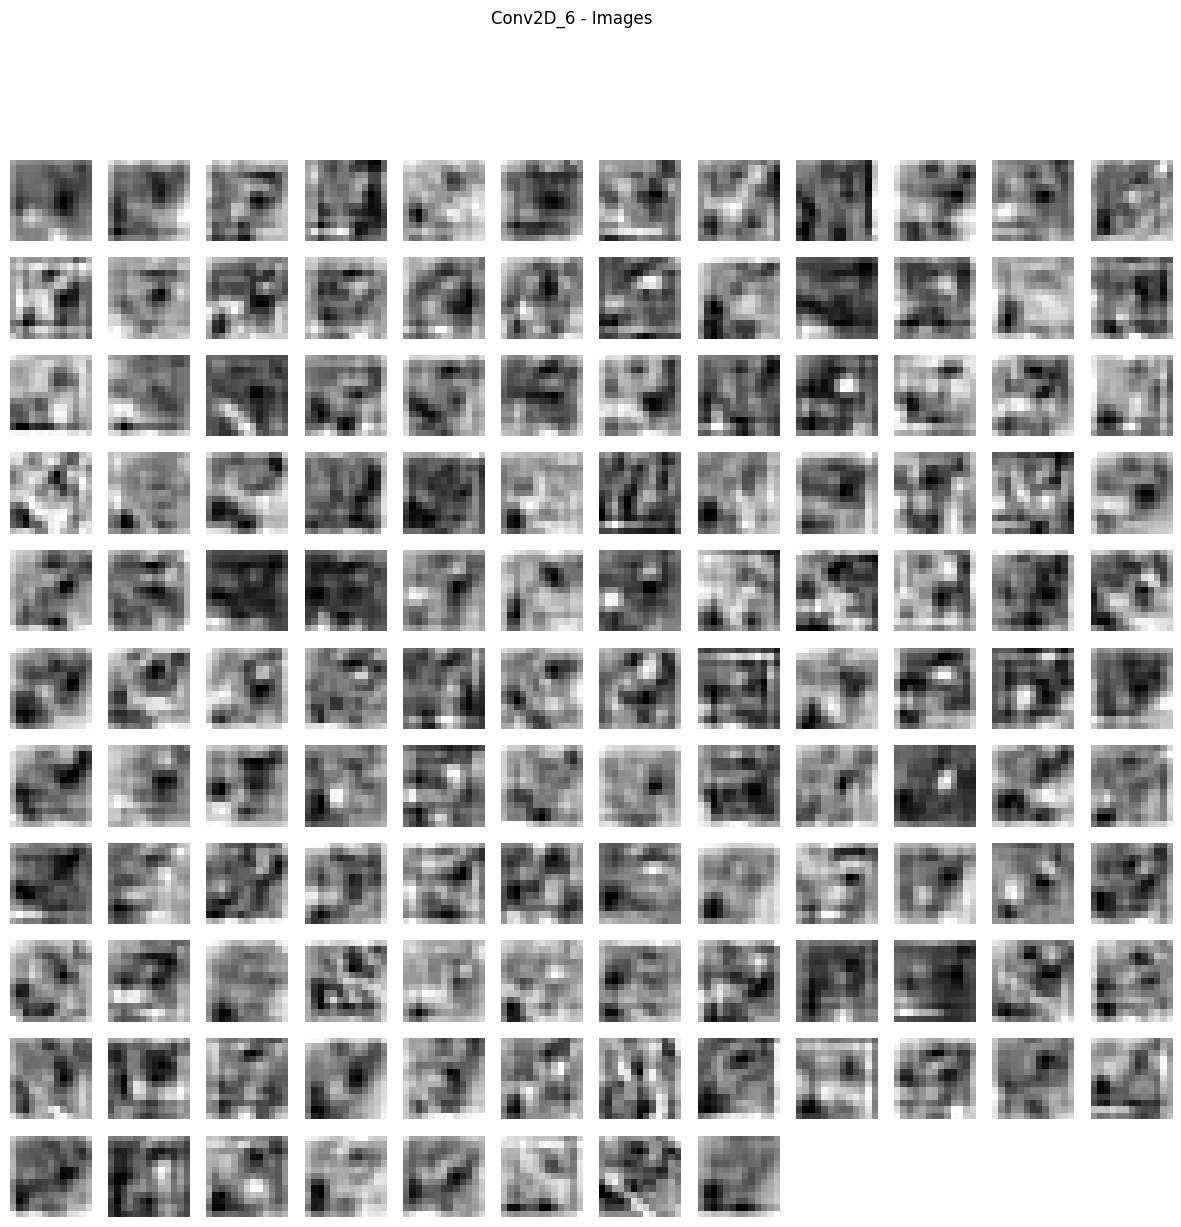

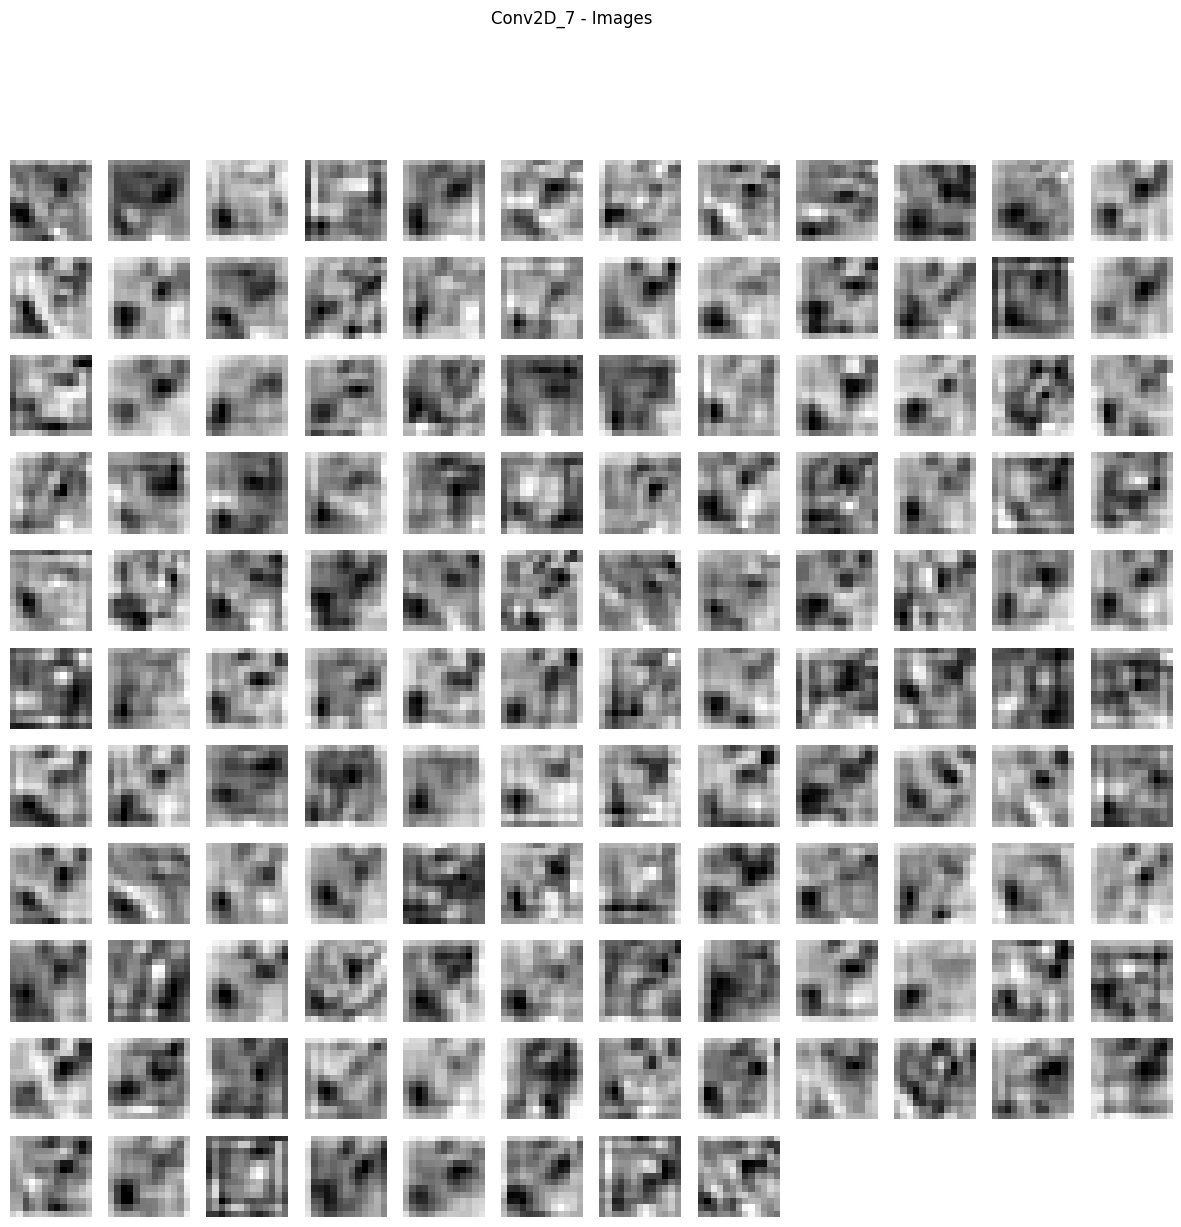

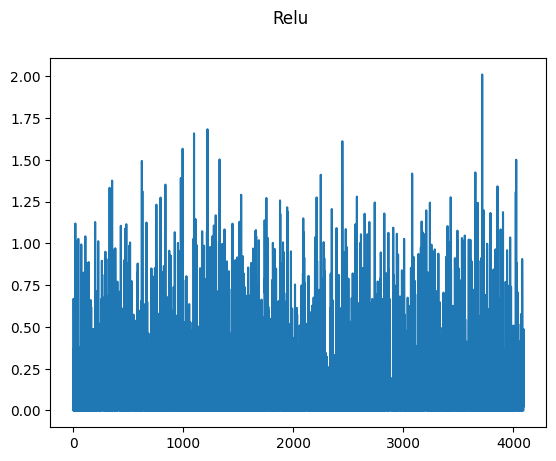

In [2]:

model = models.AlexNet()
input_shape = model.image_shape
face_image = face()

resized_face_image = resize(face_image, input_shape[:2])
plot_selected_layer_tensors(model, np.expand_dims(resized_face_image, axis=0), tensors_to_plot=['Placeholder','Conv2D','Conv2D_6', 'Conv2D_7','Relu'])

In [2]:
model_checkpoint_dir="/Users/vkapoor/Downloads/models/AlexNet/training_seed_05"
training_seed = 5
model = models.AlexNetv2(model_checkpoint_dir=model_checkpoint_dir, training_seed = training_seed)

input_shape = model.image_shape
face_image = face()
face_image = np.transpose(face_image, (2, 0, 1))
resized_face_image = np.zeros((3, 227, 227))  
for i in range(3): 
    resized_face_image[i] = np.array(resize(face_image[i], (227, 227)))



Loading model with name /Users/vkapoor/Downloads/models/AlexNet/training_seed_05/model.ckpt_epoch89
INFO:tensorflow:Restoring parameters from /Users/vkapoor/Downloads/models/AlexNet/training_seed_05/model.ckpt_epoch89


2024-06-12 16:59:34.452671: W tensorflow/core/common_runtime/graph_constructor.cc:1595] Importing a graph with a lower producer version 38 into an existing graph with producer version 1766. Shape inference will have run different parts of the graph with different producer versions.
2024-06-12 16:59:35.688226: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-06-12 16:59:36.711220: W tensorflow/c/c_api.cc:305] Operation '{name:'alexnet_v2/fc8/biases/Momentum/Assign' id:1952 op device:{requested: '', assigned: ''} def:{{{node alexnet_v2/fc8/biases/Momentum/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@alexnet_v2/fc8/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true](alexnet_v2/fc8/biases/Momentum, alexnet_v2/fc8/biases/Momentum/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either 

In [3]:
plot_selected_layer_tensors(model, np.expand_dims(resized_face_image, axis=0), tensors_to_plot=['tower_0/alexnet_v2/conv4/Conv2D'], channels_first = True)



(None, 384, 12, 12)


InvalidArgumentError: Graph execution error:

Detected at node 'tower_0/alexnet_v2/pool1/MaxPool' defined at (most recent call last):
Node: 'tower_0/alexnet_v2/pool1/MaxPool'
Default MaxPoolingOp only supports NHWC on device type CPU
	 [[{{node tower_0/alexnet_v2/pool1/MaxPool}}]]

Original stack trace for 'tower_0/alexnet_v2/pool1/MaxPool':


In [ ]:
graph = tf.compat.v1.get_default_graph()
for op in graph.operations:
    print(op.name)